In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# import xgboost as xgb

In [20]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [21]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


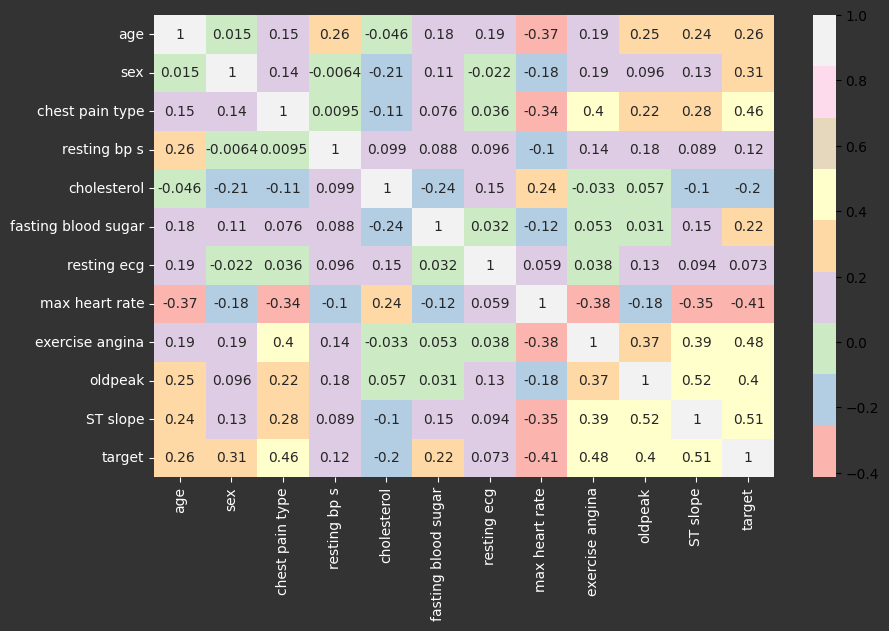

In [22]:
plt.figure(figsize=(10, 6),facecolor='#333333')
sns.heatmap(df.corr(), annot=True, cmap='Pastel1').tick_params(colors='white') 
plt.show()

In [23]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [24]:
df.shape

(1190, 12)

In [25]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

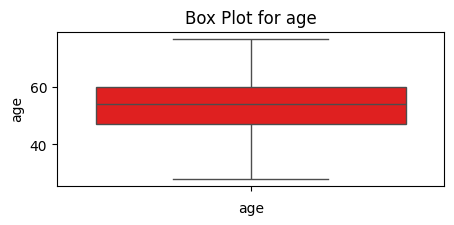

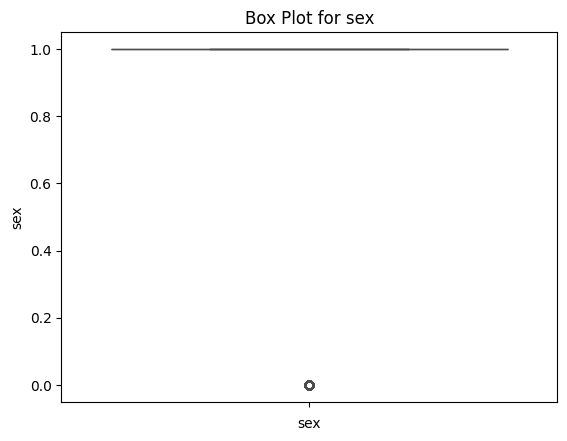

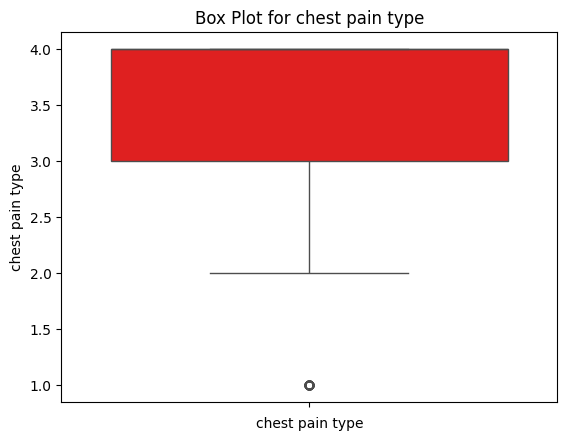

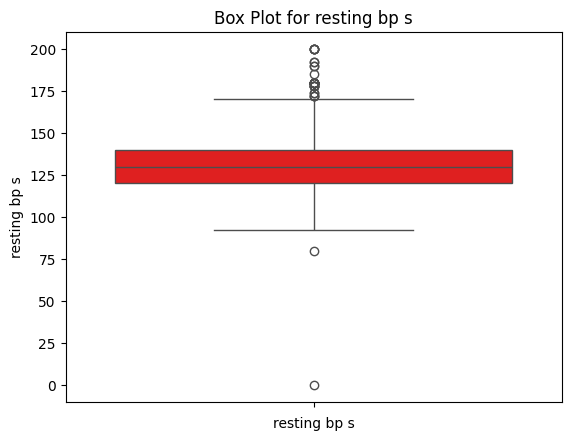

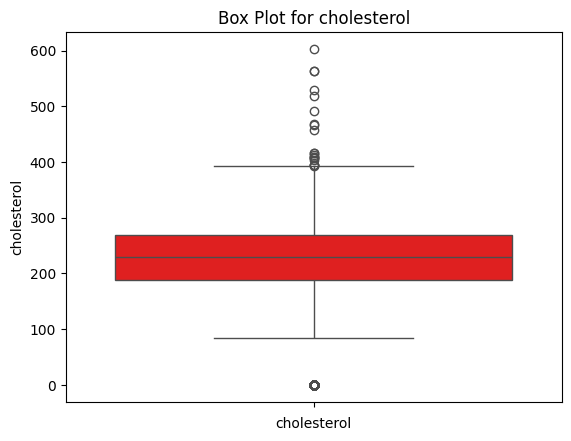

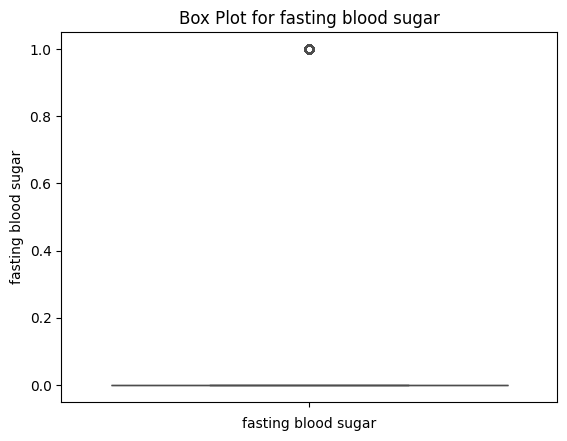

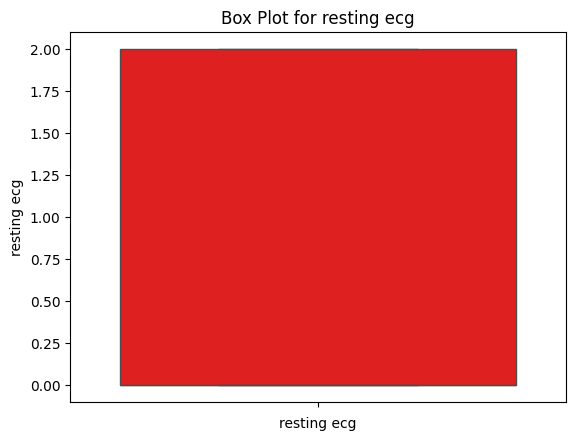

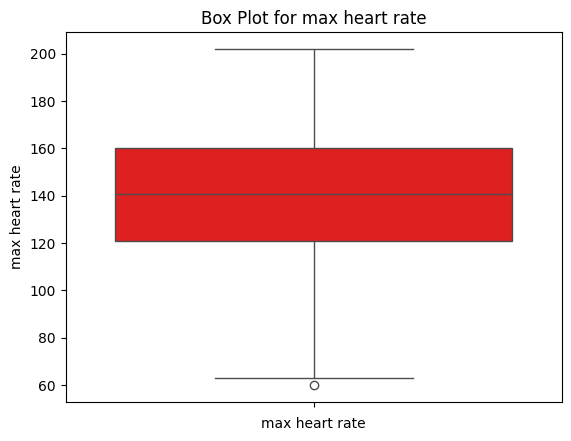

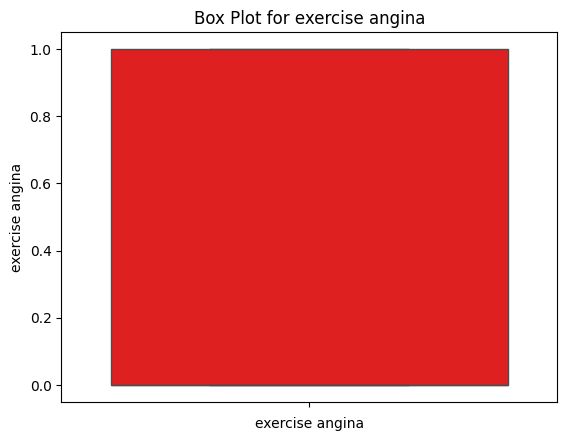

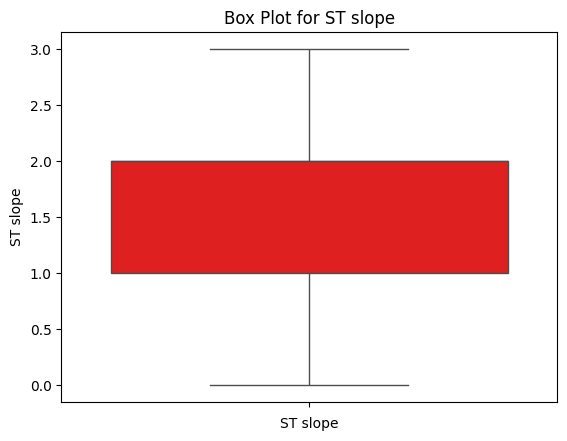

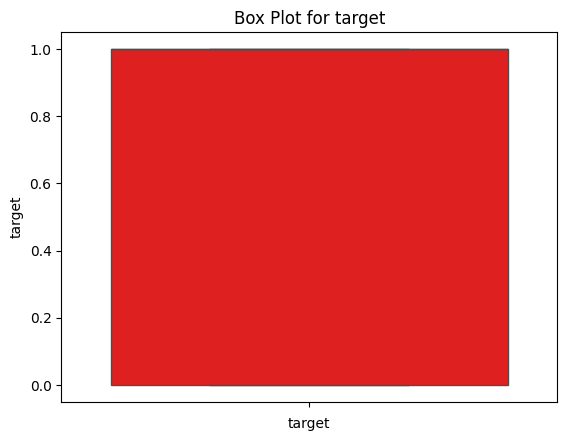

In [26]:
ColList=list(df.select_dtypes('int64').columns)
#Box Plot
plt.figure(figsize=(5, 2))
for column in ColList:
    sns.boxplot(y=df[column], color='red')
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

In [27]:
X = df.drop(columns=['target'])
y = df['target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

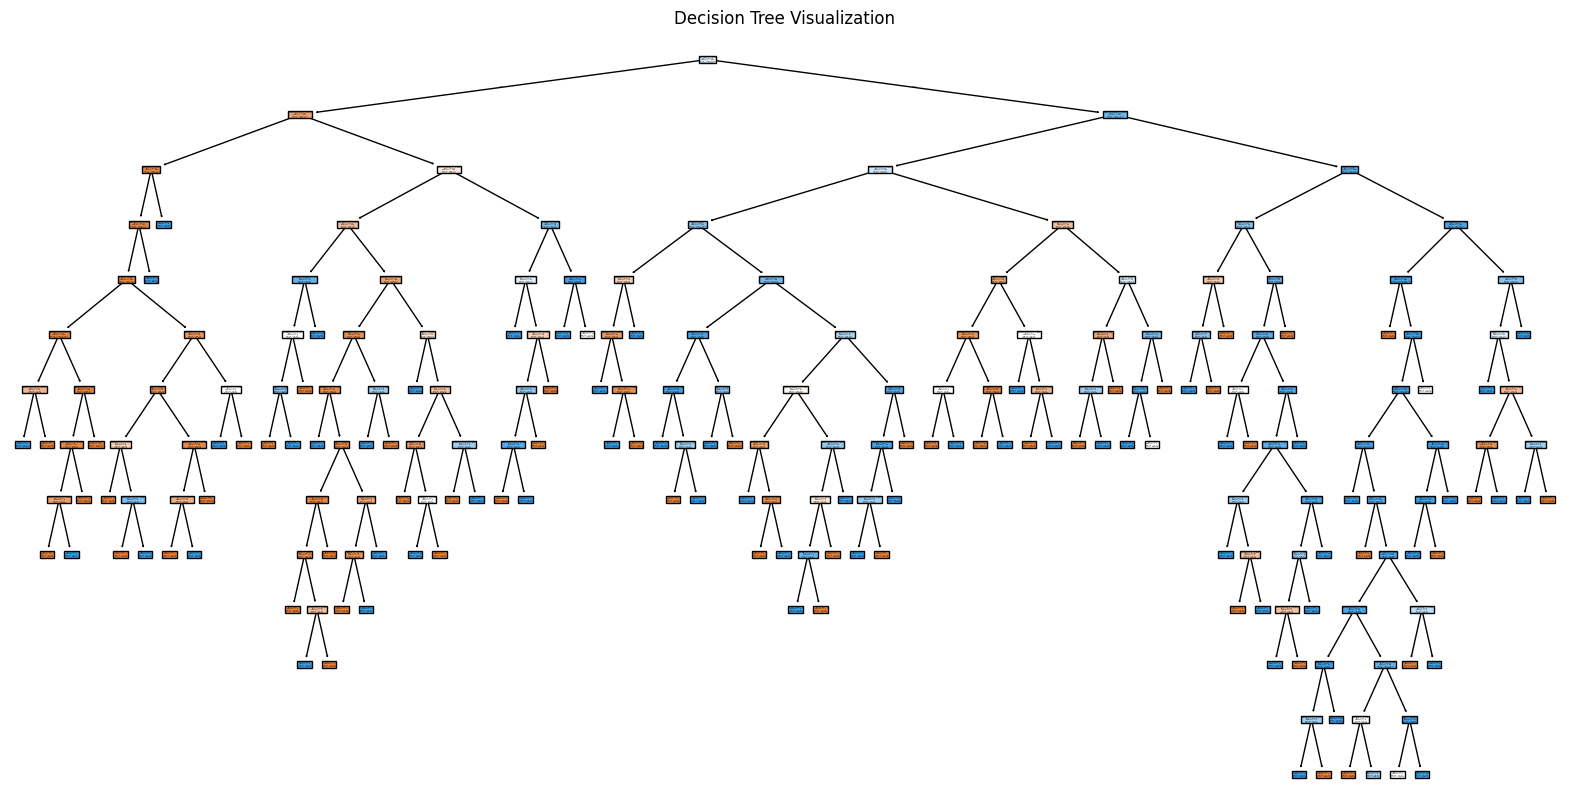

Best Parameters: {'max_depth': 13, 'min_samples_split': 3}
Test Accuracy: 0.8403361344537815


In [30]:
#Decision tree parameter estimation
decicisionTree = DecisionTreeClassifier()
paramGrid = {
    'max_depth': [3, 5, 8, 13, None],  # Try different depths
    'min_samples_split': [3, 5, 8, 13,21]  # Try different splits
}

# Use GridSearchCV to find the best hyperparameters
gridSearch = GridSearchCV(estimator=decicisionTree, param_grid=paramGrid, cv=5, scoring='accuracy')
gridSearch.fit(X_train, y_train)


# Get the best parameters
bestParam = gridSearch.best_params_

# Evaluate on the test set
bestModel = gridSearch.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(bestModel, feature_names=df.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
y_pred = bestModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", bestParam)
print("Test Accuracy:", accuracy)

In [31]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=bestParam['max_depth'],min_samples_split=bestParam['min_samples_split']),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    
}



In [32]:
results = []



In [33]:
for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))

    report = classification_report(y_test, y_pred, output_dict=True)
        
        # Store results for each model
    results.append({
            "Model": name,
            "Accuracy": np.round(accuracy, 2),
            "Precision (macro avg)": np.round(report["macro avg"]["precision"], 2),
            "Recall (macro avg)": np.round(report["macro avg"]["recall"], 2),
            "F1-score (macro avg)": np.round(report["macro avg"]["f1-score"], 2)
        })

Training Logistic Regression...
Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       118
           1       0.84      0.78      0.81       120

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238

Training Decision Tree...
Decision Tree Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       118
           1       0.88      0.79      0.83       120

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

Training Random Forest...
Random Forest Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       118
           1       0.93      0.93      0.93       120

    a

In [34]:
#COnvert the result into a datafram
results_df= pd.DataFrame(results)
modelComparisionColumns=results_df.drop(columns=['Model']).columns.to_list()

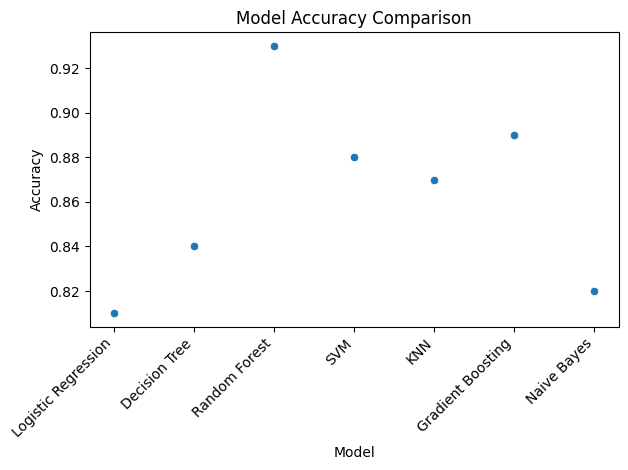

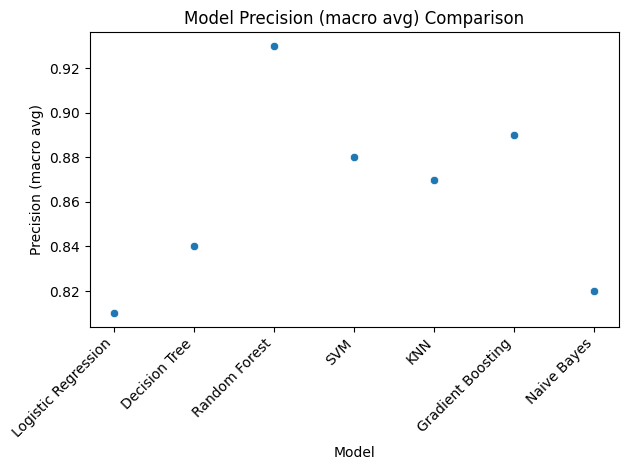

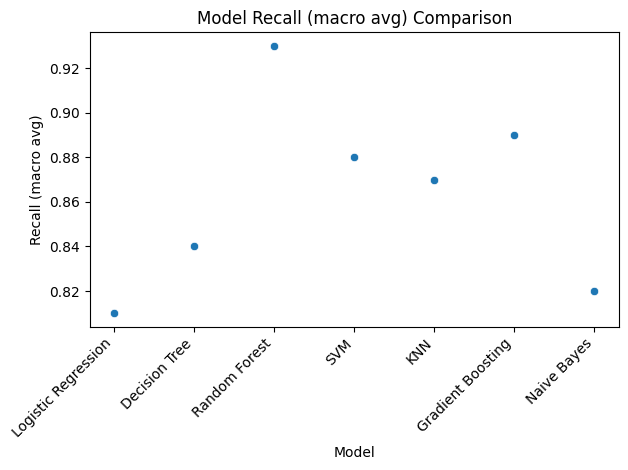

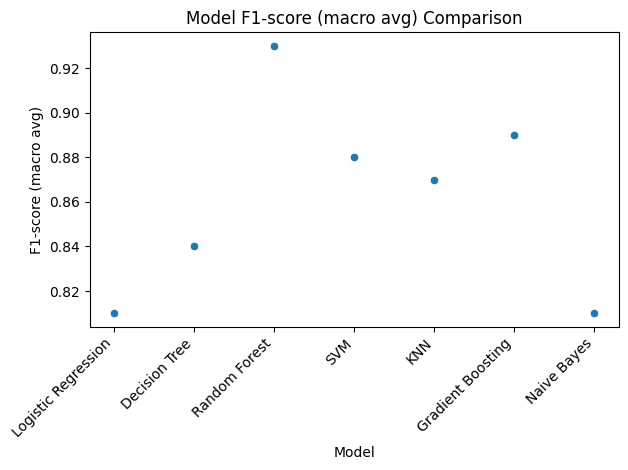

In [35]:
for i in modelComparisionColumns:
    

    sns.scatterplot(y= results_df[i],x = results_df['Model'])
    
    plt.xticks(rotation=45, ha="right") 
    plt.title(f"Model {i} Comparison")
    plt.tight_layout()
    plt.show()

In [36]:
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1-score (macro avg)
0,Logistic Regression,0.81,0.81,0.81,0.81
1,Decision Tree,0.84,0.84,0.84,0.84
2,Random Forest,0.93,0.93,0.93,0.93
3,SVM,0.88,0.88,0.88,0.88
4,KNN,0.87,0.87,0.87,0.87
5,Gradient Boosting,0.89,0.89,0.89,0.89
6,Naive Bayes,0.82,0.82,0.82,0.81


#Processing with K fold K as 5

In [56]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=bestParam['max_depth'],min_samples_split=bestParam['min_samples_split']),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    
}




In [57]:
testResult = []

In [58]:
# Define the number of folds
k = 5  # 5-fold cross-validation

# Initialize KFold with the number of splits
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for modelName,model in models.items():
    pipeline = Pipeline ([
        ('scaler', StandardScaler()),('classifier',model)
    ])

# Perform cross-validation and get scores
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    testResult.append({'modelName':modelName,'score':scores})

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())


Accuracy for each fold: [0.85714286 0.86554622 0.82773109 0.81092437 0.82773109]
Mean accuracy: 0.8378151260504201


In [84]:
scores_df = pd.DataFrame(
    [result['score'] for result in testResult],
    columns=[f"Fold {i+1}" for i in range(5)]
)
scores_df.insert(0, 'Model Name', [result['modelName'] for result in testResult])

# Display the expanded DataFrame
print(scores_df)


            Model Name    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
0  Logistic Regression  0.861345  0.865546  0.815126  0.810924  0.789916
1        Decision Tree  0.890756  0.878151  0.894958  0.865546  0.836134
2        Random Forest  0.957983  0.949580  0.932773  0.932773  0.873950
3                  SVM  0.890756  0.899160  0.878151  0.844538  0.844538
4                  KNN  0.886555  0.869748  0.857143  0.840336  0.794118
5    Gradient Boosting  0.915966  0.911765  0.890756  0.857143  0.857143
6          Naive Bayes  0.857143  0.865546  0.827731  0.810924  0.827731
